In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('/content/drive/MyDrive/export-4.csv')

In [24]:
df.head()

,author,content,description,publishedAt,title,url,urlToImage,from_date,source_id,source_name,description_pt,content_pt,title_pt
0,NaN,"In 1898, two male lions terrorized an encampme...",Scientists analyzed hairs extracted from the b...,2024-10-11T18:09:45Z,"Genomic study identifies human, animal hair in...",https://www.sciencedaily.com/releases/2024/10/...,https://www.sciencedaily.com/images/scidaily-i...,2024-10-20,NaN,Science Daily,Cientistas analisaram pelos extraídos de dente...,"Em 1898, dois leões machos aterrorizaram um ac...",Estudo genômico identifica pelos humanos e ani...
1,NaN,"Researchers at Yale School of Medicine, found ...",Researchers found a higher concentration of a ...,2024-10-17T15:37:04Z,Specific type of DNA could be a target of futu...,https://www.sciencedaily.com/releases/2024/10/...,https://www.sciencedaily.com/images/scidaily-i...,2024-10-20,NaN,Science Daily,Pesquisadores encontraram uma concentração mai...,Pesquisadores da Escola de Medicina de Yale en...,Um tipo específico de DNA pode ser alvo de fut...
2,James Purtill,When I learnt this week the company 23andMe wa...,"Eight years ago, in what now seems like an act...",2024-10-16T19:00:00Z,"Eight years ago, my brother gave his DNA to 23...",https://www.abc.net.au/news/science/2024-10-17...,https://live-production.wcms.abc-cdn.net.au/30...,2024-10-20,abc-news-au,ABC News (AU),"Oito anos atrás, no que agora parece um ato de...",Quando soube esta semana que a empresa 23andMe...,"Oito anos atrás, meu irmão deu seu DNA para 23..."
3,"Lars Daniel, Contributor, \n Lars Daniel, Cont...",Low-angle view of logo on facade of personal g...,"The implications of this sale are significant,...",2024-10-15T11:09:51Z,Did You Give Your DNA To 23andMe? Here’s Why Y...,https://www.forbes.com/sites/larsdaniel/2024/1...,https://imageio.forbes.com/specials-images/ima...,2024-10-20,NaN,Forbes,"As implicações desta venda são significativas,...",Visão de ângulo baixo do logotipo na fachada d...,Você deu seu DNA para 23andMe? Aqui está o mot...
4,Lila MacLellan,"Anne Wojcicki, CEO of 23andMe, the struggling ...",Some past employees weren’t exactly surprised ...,2024-10-18T10:53:25Z,"Behind the scenes at 23andMe, questions about ...",https://fortune.com/2024/10/18/behind-the-scen...,https://fortune.com/img-assets/wp-content/uplo...,2024-10-20,fortune,Fortune,Alguns ex-funcionários não ficaram exatamente ...,"Anne Wojcicki, CEO da 23andMe, a empresa de te...","Nos bastidores da 23andMe, perguntas sobre um ..."


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


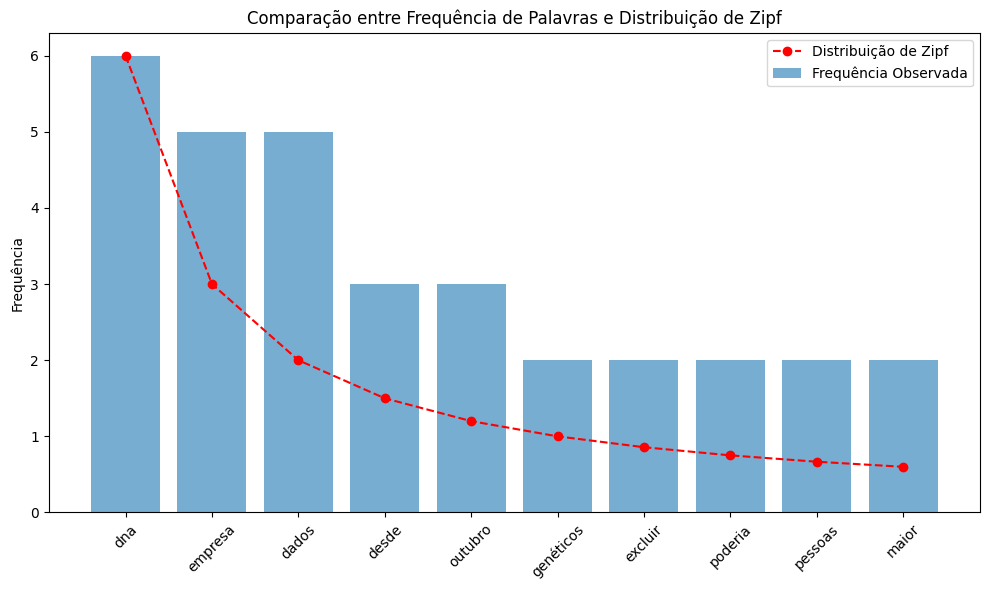

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter

nltk.download("stopwords")
stopwordList = set(nltk.corpus.stopwords.words('portuguese'))

df['tokens'] = df['content_pt'].apply(lambda x: x.split())
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [t.lower() for t in tokens if t.lower() not in stopwordList and t.isalpha()])

all_words = [word for tokens in df['filtered_tokens'] for word in tokens]
word_freq = Counter(all_words)

df_word_count = pd.DataFrame(word_freq.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

top_10_words = df_word_count.head(10)
top_words = top_10_words['word'].tolist()
top_freqs = top_10_words['count'].tolist()

zipf_values = [top_freqs[0] / (i + 1) for i in range(len(top_freqs))]

plt.figure(figsize=(10,6))
plt.bar(top_words, top_freqs, alpha=0.6, label='Frequência Observada')
plt.plot(top_words, zipf_values, color='red', marker='o', linestyle='dashed', label='Distribuição de Zipf')

plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.title('Comparação entre Frequência de Palavras e Distribuição de Zipf')
plt.legend()
plt.tight_layout()
plt.show()